In [14]:
%load_ext autoreload
%autoreload 2

import sys
import os
import psutil
import numpy as np
import xarray as xr
from segysak.segy import segy_loader, get_segy_texthead, segy_header_scan, segy_header_scrape
from segysak import create_seismic_dataset, create3d_dataset, create2d_dataset

import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def print_mem_usage():
    mem = psutil.Process(os.getpid()).memory_info()
    print('Mbytes:', mem.rss/1e6)

In [5]:
print_mem_usage()

Mbytes: 138.006528


In [6]:
# Create an empty seismic cube by specifying dimensions as arrays of values.
d1 = create_seismic_dataset(twt=np.arange(1001), d2=5, cmp=np.r_[1, 2, 3], offset=np.r_[100, 200, 351], d5=np.linspace(10, 100, 10))
print_mem_usage()
d1


Mbytes: 138.022912


<xarray.Dataset>
Dimensions:  (d1: 3, d2: 5, d3: 1001, d4: 3, d5: 10)
Coordinates:
    cmp      (d1) int32 1 2 3
    xline    (d2) int32 1 2 3 4 5
    twt      (d3) int32 0 1 2 3 4 5 6 7 8 ... 993 994 995 996 997 998 999 1000
    offset   (d4) int32 100 200 351
  * d5       (d5) float64 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0
Dimensions without coordinates: d1, d2, d3, d4
Data variables:
    *empty*
Attributes:
    ns:                1001
    ds:                None
    text:              None
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [9]:
d1.attrs

{'ns': 1001,
 'ds': None,
 'text': None,
 'd3_units': None,
 'd3_domain': None,
 'epsg': None,
 'corner_points': None,
 'corner_points_xy': None,
 'source_file': None,
 'srd': None,
 'datatype': None}

In [11]:
d1.set_index({'offset':'offset'}, append=False)

<xarray.Dataset>
Dimensions:  (d1: 3, d2: 5, d3: 1001, d5: 10, offset: 3)
Coordinates:
    cmp      (d1) int32 1 2 3
    xline    (d2) int32 1 2 3 4 5
    twt      (d3) int32 0 1 2 3 4 5 6 7 8 ... 993 994 995 996 997 998 999 1000
  * d5       (d5) float64 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0
Dimensions without coordinates: d1, d2, d3, offset
Data variables:
    offset   (offset) int64 100 200 351
Attributes:
    ns:                1001
    ds:                None
    text:              None
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [12]:
d1

<xarray.Dataset>
Dimensions:  (d1: 3, d2: 5, d3: 1001, d4: 3, d5: 10)
Coordinates:
    cmp      (d1) int32 1 2 3
    xline    (d2) int32 1 2 3 4 5
    twt      (d3) int32 0 1 2 3 4 5 6 7 8 ... 993 994 995 996 997 998 999 1000
    offset   (d4) int32 100 200 351
  * d5       (d5) float64 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0
Dimensions without coordinates: d1, d2, d3, d4
Data variables:
    *empty*
Attributes:
    ns:                1001
    ds:                None
    text:              None
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [24]:
# Create a data variable.
d1['data'] = 0.0
d1

<xarray.Dataset>
Dimensions:  (d1: 3, d2: 5, d3: 1001, d4: 3, d5: 10)
Coordinates:
    cmp      (d1) int32 1 2 3
    xline    (d2) int32 1 2 3 4 5
    twt      (d3) int32 0 1 2 3 4 5 6 7 8 ... 993 994 995 996 997 998 999 1000
    offset   (d4) int32 100 200 351
  * d5       (d5) float64 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0
Dimensions without coordinates: d1, d2, d3, d4
Data variables:
    data     float64 0.0
Attributes:
    ns:                1001
    ds:                None
    text:              None
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [29]:
# Create a data variable that has dimensions
shape = list(d1.dims.values())
d1['data'] = (('d1', 'd2', 'd3', 'd4', 'd5'), np.zeros(shape))

d1['data_ar'] = xr.DataArray(np.zeros(shape), dims=('d1', 'd2', 'd3', 'd4', 'd5'))
d1

<xarray.Dataset>
Dimensions:  (d1: 3, d2: 5, d3: 1001, d4: 3, d5: 10)
Coordinates:
  * d5       (d5) float64 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0
    cmp      (d1) int32 1 2 3
    xline    (d2) int32 1 2 3 4 5
    twt      (d3) int32 0 1 2 3 4 5 6 7 8 ... 993 994 995 996 997 998 999 1000
    offset   (d4) int32 100 200 351
Dimensions without coordinates: d1, d2, d3, d4
Data variables:
    data     (d1, d2, d3, d4, d5) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    data_ar  (d1, d2, d3, d4, d5) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    ns:                1001
    ds:                None
    text:              None
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [7]:
d2 = create_seismic_dataset(twt=np.arange(1001), d2=5, cmp=np.r_[1, 2, 3], offset=np.r_[100, 200, 351], ss=np.linspace(10, 100, 10))
d2

ValueError: Unknown dimension name ss, expected like d1, d2, ..., dN

In [16]:
get_segy_texthead('data/mg93i2_crop_xl_13250_13270.segy')

'C 1 DATE 2019-07-18\nC 2 AN INCREASE IN AMPLITUDE EQUALS AN INCREASE IN ACOUSTIC IMPEDANCE\nC 3 Written by libsegyio (python)\nC 4\nC 5\nC 6\nC 7\nC 8\nC 9\nC10\nC11 TRACE HEADER POSITION:\nC12   INLINE BYTES 181-185    | OFFSET BYTES 037-041\nC13   CROSSLINE BYTES 193-197 |\nC14\nC15 END EBCDIC HEADER\nC16\nC17\nC18\nC19\nC20\nC21\nC22\nC23\nC24\nC25\nC26\nC27\nC28\nC29\nC30\nC31\nC32\nC33\nC34\nC35\nC36\nC37\nC38\nC39\nC40                                                                            �'

In [13]:
print_mem_usage()
mg93 = segy_loader('data/mg93i2_crop_xl_13250_13270.segy', iline=189, xline=193)
print_mem_usage()
print(mg93)
print_mem_usage()


Mbytes: 101.515264



Fast direction is INLINE_3D



Mbytes: 222.179328
<xarray.Dataset>
Dimensions:  (d1: 651, d2: 21, d3: 1001)
Coordinates:
    iline    (d1) int32 350 351 352 353 354 355 356 ... 995 996 997 998 999 1000
    xline    (d2) int32 13250 13251 13252 13253 ... 13267 13268 13269 13270
    twt      (d3) int32 0 4 8 12 16 20 24 ... 3976 3980 3984 3988 3992 3996 4000
    cdp_x    (d1, d2) float64 4.418e+05 4.418e+05 ... 4.362e+05 4.362e+05
    cdp_y    (d1, d2) float64 6.681e+06 6.681e+06 ... 6.687e+06 6.687e+06
Dimensions without coordinates: d1, d2, d3
Data variables:
    data     (d1, d2, d3) float64 9.969e+36 9.969e+36 9.969e+36 ... 509.7 0.0
Attributes:
    ns:                1001
    ds:                None
    text:              C 1 DATE 2019-07-18\nC 2 AN INCREASE IN AMPLITUDE EQUA...
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None
Mbytes: 218.5

Mbytes: 284.565504


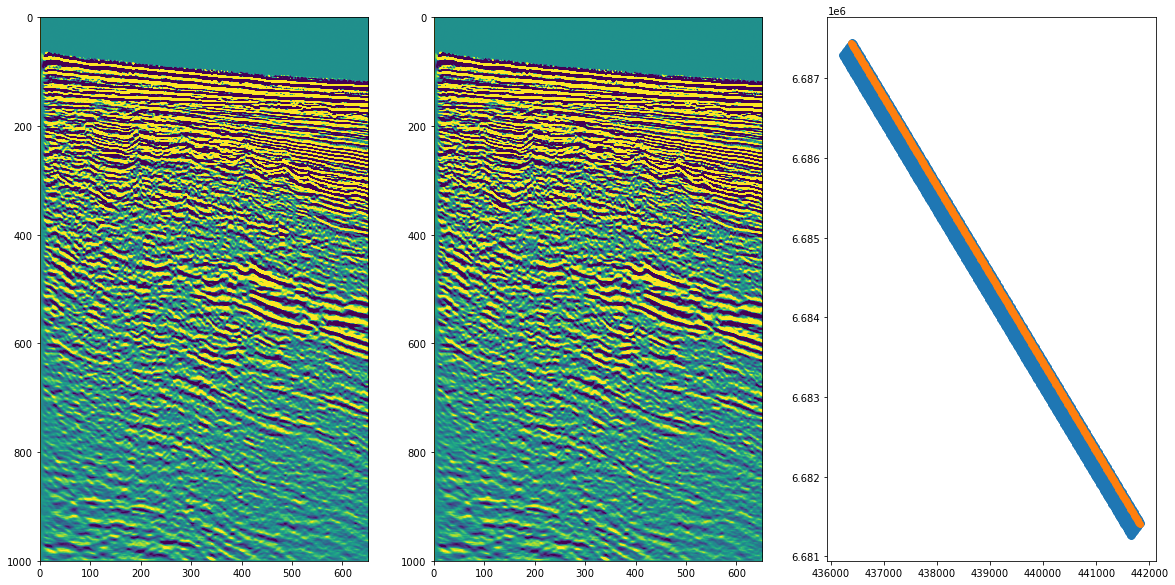

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

line1 = mg93.isel(d2=1)
line1 = mg93.sel(d2=1)

# line2 = mg93.sel(xline == 13252)
promoted = mg93.set_index(d2='xline')
line2 = promoted.sel(d2=13252)

axs[0].imshow(line1.data.T, aspect='auto', vmin=-2000, vmax=2000)
axs[1].imshow(line2.data.T, aspect='auto', vmin=-2000, vmax=2000)
axs[2].scatter(mg93.cdp_x.values.ravel(), mg93.cdp_y.values.ravel())
axs[2].scatter(line2.cdp_x, line2.cdp_y)

print_mem_usage()


In [41]:
promoted

<xarray.Dataset>
Dimensions:  (d1: 651, d2: 21, d3: 1001)
Coordinates:
    iline    (d1) int32 350 351 352 353 354 355 356 ... 995 996 997 998 999 1000
    twt      (d3) int32 0 4 8 12 16 20 24 ... 3976 3980 3984 3988 3992 3996 4000
    cdp_x    (d1, d2) float64 4.418e+05 4.418e+05 ... 4.362e+05 4.362e+05
    cdp_y    (d1, d2) float64 6.681e+06 6.681e+06 ... 6.687e+06 6.687e+06
  * d2       (d2) int64 13250 13251 13252 13253 ... 13267 13268 13269 13270
Dimensions without coordinates: d1, d3
Data variables:
    data     (d1, d2, d3) float64 9.969e+36 9.969e+36 9.969e+36 ... 509.7 0.0
Attributes:
    ns:                1001
    ds:                None
    text:              C 1 DATE 2019-07-18\nC 2 AN INCREASE IN AMPLITUDE EQUA...
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [67]:
help(segy_loader)

Help on function segy_loader in module segysak.segy:

segy_loader(segyfile, ncfile=None, cmp=None, iline=None, xline=None, cdpx=None, cdpy=None, offset=None, vert_domain='TWT', data_type='AMP', ix_crop=None, cmp_crop=None, xy_crop=None, z_crop=None, return_geometry=False, silent=False, extra_byte_fields=None, **segyio_kwargs)
    Convert SEGY data to NetCDF4 File
    
    The output ncfile has the following structure
        Dimensions:
            d1 - CMP or Inline axis
            d2 - Xline axis
            d3 - The vertical axis
            d4 - Offset/Angle Axis
        Coordinates:
            iline - The inline numbering
            xline - The xline numbering
            cdp_x - Eastings
            cdp_y - Northings
            cmp - Trace Number for 2d
        Variables
            data - The data volume
        Attributes:
            TBC
    
    Args:
        segyfile (str): Input segy file path
        ncfile (str, optional): Output SEISNC file path. If none the loaded d

In [5]:
s = segy_loader("data/Mx1.sgy", ncfile='test.seisnc', extra_byte_fields=[21, 25, 181])


In [29]:
s = segy_loader("data/left-small.sgy", ncfile='test.seisnc', cdpx=181, cdpy=185, iline=189, xline=193, extra_byte_fields=[21, 25, 181])
s


Fast direction is CROSSLINE_3D


<xarray.Dataset>
Dimensions:    (d1: 5, d2: 5, d3: 50)
Coordinates:
    iline      (d1) int32 ...
    twt        (d3) int32 ...
    xline      (d2) int32 ...
    cdp_x      (d1, d2) float64 2.1e+03 2.079e+03 ... 2.037e+03 2.016e+03
    cdp_y      (d1, d2) float64 0.0 0.0 0.0 0.0 0.0 ... 84.0 84.0 84.0 84.0 84.0
Dimensions without coordinates: d1, d2, d3
Data variables:
    data       (d1, d2, d3) float64 ...
    CDP        (d1, d2) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
    CDP_TRACE  (d1, d2) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
    CDP_X      (d1, d2) float64 2.1e+03 2.079e+03 ... 2.037e+03 2.016e+03
Attributes:
    ns:                50
    text:              C 1 DATE: 2016-09-19\nC 2 AN INCREASE IN AMPLITUDE EQU...
    ds:                None
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [59]:
data = s.data.values
n=5000
print('dims', data.shape, 'size', data.size)
# create new xarray
print('New Xarray')
start = timer()
for i in range(n):
    v = s.data*s.data
end = timer()
print('Total:', end-start)
# store in dataset variable, only create once
s['data2'] = s.data 
print('Xarray Assignment')
start = timer()
for i in range(n):
    s['data2'] = s.data * s.data
end = timer()
print('Total:', end-start)
# use numpy only
print('Numpy')
start = timer()
for i in range(n):
    u = data*data
end = timer()
print('Total:', end-start)
# use numpy with preallocation
print('Numpy with pre-allocate')
v = np.zeros_like(data)
start = timer()
for i in range(n):
    v[:, :, :] = data*data
end = timer()
print('Total:', end-start)

dims (5, 5, 50) size 1250
New Xarray
Total: 6.782761200000095
Xarray Assignment
Total: 10.3423967000017
Numpy
Total: 0.006485099998826627
Numpy with pre-allocate
Total: 0.010271200000715908


In [63]:
data = s.data.values
n=5000
print('dims', data.shape, 'size', data.size)
# create new xarray
print('Xarray Isel')
start = timer()
for i in range(n):
    v = s.isel(d1=[2, 3, 4], drop=True)
end = timer()
print('Total:', end-start)
# store in dataset variable, only create once
s['data2'] = s.data 
print('Xarray Direct Indexing')
start = timer()
for i in range(n):
    v = s.data.values[2:5, :, :]
end = timer()
print('Total:', end-start)
# use numpy only
print('Numpy')
v = s.data.values
start = timer()
for i in range(n):
    u = v[2:5, :, :]
end = timer()
print('Total:', end-start)

dims (5, 5, 50) size 1250
Xarray Isel
Total: 1.8477629000008164
Xarray Direct Indexing
Total: 1.549663199999486
Numpy
Total: 0.0020642999988922384


In [61]:
s

<xarray.Dataset>
Dimensions:    (d1: 5, d2: 5, d3: 50)
Coordinates:
    iline      (d1) int32 1 2 3 4 5
    twt        (d3) int32 0 4 8 12 16 20 24 28 ... 172 176 180 184 188 192 196
    xline      (d2) int32 20 21 22 23 24
    cdp_x      (d1, d2) float64 2.1e+03 2.079e+03 ... 2.037e+03 2.016e+03
    cdp_y      (d1, d2) float64 0.0 0.0 0.0 0.0 0.0 ... 84.0 84.0 84.0 84.0 84.0
Dimensions without coordinates: d1, d2, d3
Data variables:
    data       (d1, d2, d3) float64 1.2 1.2 1.2 1.2 1.2 ... 5.24 5.24 5.24 5.24
    CDP        (d1, d2) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
    CDP_TRACE  (d1, d2) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
    CDP_X      (d1, d2) float64 2.1e+03 2.079e+03 ... 2.037e+03 2.016e+03
    data2      (d1, d2, d3) float64 1.44 1.44 1.44 1.44 ... 27.46 27.46 27.46
Attributes:
    ns:                50
    text:              C 1 DATE: 2016-09-19\nC 2 AN INCREASE IN AMPLITUDE EQU...
    ds:                None
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None